#### Vectors and matrices in Python
Qiskit uses the Python programming language, so before discussing Qiskit specifically it may be helpful to very briefly discuss matrix and vector computations in Python. In Python, matrix and vector computations can be performed using the array class from the NumPy library (which includes many additional components for numerical computation).

Here is an example of a code cell that defines two vectors, ket0 and ket1 , corresponding to the qubit state vectors 
∣
0
⟩
∣0⟩ and 
∣
1
⟩
,
∣1⟩, and displays their average

In [2]:
import sys
print(sys.version)
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]


array([0.5, 0.5])

#### Using the display command is not necessary, simply running the code-cell will display our result directly

In [3]:
ket0 / 2 + ket1 / 2

array([0.5, 0.5])

We can also use arrays to create matrices which will be used as operations

In [4]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the matmul function from NumPy :

In [5]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

### *States, measurements, operations*
QiSkit has plenty of inbuilt functions regarding states, the measurements of these states and the operations done upon them. Which mean that programming from scratch is not a necessity, below will be given a few examples of these inbuilt functions:

#### *Defining and displaying vectors*
Qiskit's Statevector class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the Statevector class and defines a few vectors using it. (Note that we need the sqrt function from the NumPy library to compute the square roots for the vector u .)

In [6]:
import qiskit
print(qiskit.__version__)
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

1.0.1
State vectors u, v, and w have been defined.


The Statevector class provides a draw method for displaying state vectors, including latex and text options for different visualizations, as this code cell demonstrates:

In [7]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

The Statevector class also includes the is_valid method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [8]:
display(u.is_valid())
display(w.is_valid())

True

False

Simulating measurements using Statevector
Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the measure method from the Statevector class.

First, we create a qubit state vector v and then display it.

In [9]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

Code cells can be modified — so go ahead and change the specification of the vector if you wish.

Next, running the measure method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [10]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector v 
1000
1000 times, which (with high probability) results in the outcome 
0
0 approximately 
5
5 out of every 
9
9 times (or about 
556
556 of the 
1000
1000 trials) and the the outcome 
1
1 approximately 
4
4 out of every 
9
9 times (or about 
444
444 out of the 
1000
1000 trials). The cell also demonstrates the plot_histogram function for visualizing the results.

{'0': 551, '1': 449}

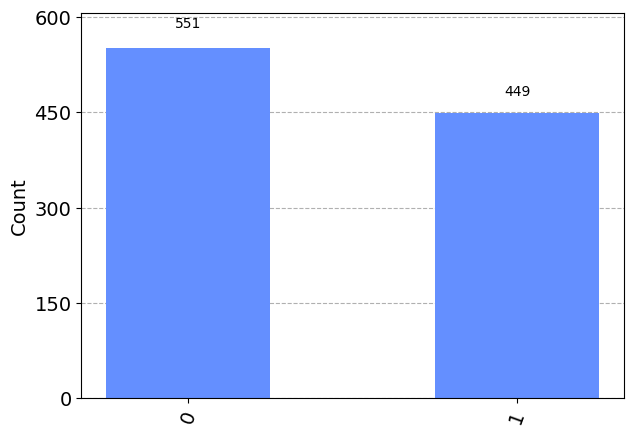

In [11]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

Running the cell multiple times and trying different numbers of samples in place of 
1000
1000 may be helpful for developing some intuition for how the number of trials influences the estimated probabilities.

Performing operations with Operator and Statevector
Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.

In [14]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("latex")

<IPython.core.display.Latex object>